In [7]:
# Descargar librerias para manipulación de datos 
import pandas as pd
import numpy as np
import seaborn as sns
import requests

In [6]:
# Accedo directamente al CSV ya que la api no devuelve los datasets de las visualizaciones
internet_penet = pd.read_csv("https://datosabiertos.enacom.gob.ar/rest/datastreams/281491/data.csv")
internet_tec = pd.read_csv("https://datosabiertos.enacom.gob.ar/rest/datastreams/275029/data.csv")
internet_vel = pd.read_csv("https://datosabiertos.enacom.gob.ar/rest/datastreams/288059/data.csv")
internet_acc_vel = pd.read_csv("https://datosabiertos.enacom.gob.ar/rest/datastreams/280921/data.csv")

In [8]:
# Accedo mediante la API
response = requests.get("http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-POR/data.ajson/?auth_key=9yZFM9svSV3I2epH4ZPwDxtNuXvnoEI8xveLiwiv")
data = response.json()
internet_tec_prov = data["result"]
response = requests.get("http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-TOTAL-NACIO-DE-LA/data.ajson/?auth_key=9yZFM9svSV3I2epH4ZPwDxtNuXvnoEI8xveLiwiv")
data = response.json()
telefonia = data["result"]

In [9]:
# Convierto la primer file en el nombre de las columnas
telefonia = pd.DataFrame(telefonia)
telefonia.columns = telefonia.iloc[0]
telefonia = telefonia[1:]

### Exploramos la infomación de nuestros datos

In [12]:
# Exploramos la infomación de nuestros datos 
internet_penet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           34 non-null     int64 
 1   Trimestre                     34 non-null     int64 
 2   Accesos por cada 100 hogares  34 non-null     object
 3   Accesos por cada 100 hab      34 non-null     object
 4   Periodo                       34 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [13]:
# Exploramos la infomación de nuestros datos 
internet_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           34 non-null     int64  
 1   Trimestre     34 non-null     int64  
 2   ADSL          34 non-null     object 
 3   Cablemodem    34 non-null     object 
 4   Fibra óptica  34 non-null     object 
 5   Wireless      34 non-null     float64
 6   Otros         34 non-null     float64
 7   Total         34 non-null     object 
 8   Periodo       34 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.5+ KB


In [14]:
# Exploramos la infomación de nuestros datos 
internet_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     34 non-null     int64 
 1   Trimestre               34 non-null     int64 
 2   Mbps (Media de bajada)  34 non-null     object
 3   Trimestre.1             34 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [15]:
# Exploramos la infomación de nuestros datos 
internet_acc_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      34 non-null     int64  
 1   Trimestre                34 non-null     int64  
 2   Hasta 512 kbps           34 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  34 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    34 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   34 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  34 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  34 non-null     object 
 8   Más de 30 Mbps           34 non-null     object 
 9   OTROS                    34 non-null     float64
 10  Total                    34 non-null     object 
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 3.3+ KB


## Visualizamos los primero datos de la Tablas

In [20]:
internet_penet.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,2,"75,97","23,72",Abr-Jun 2022
1,2022,1,"73,88","23,05",Ene-Mar 2022
2,2021,4,"73,18","22,81",Oct-Dic 2021
3,2021,3,"70,58","21,98",Jul-Sept 2021
4,2021,2,"69,24","21,55",Abr-Jun 2021


In [19]:
internet_tec.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
1,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
2,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
3,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021
4,2021,2,2.018.587,5.641.731,1.472.246,476.968,253.552,9.863.084,Abr-Jun 2021


In [21]:
internet_vel.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,2,"58,44",Abr-Jun 2022
1,2022,1,"55,11",Ene-Mar 2022
2,2021,4,"52,34",Oct-Dic 2021
3,2021,3,"48,46",Jul-Sept 2021
4,2021,2,"45,63",Abr-Jun 2021


In [22]:
internet_acc_vel.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684,NaN
1,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009,NaN
2,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794,NaN
3,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541,NaN
4,2021,2,40.172,42.024,2.531.271,1.080.279,693.277,647.401,4.661.291,167.369,9.863.084,NaN


In [31]:
# Elimino la ultima columna de la tabla que tiene datos NAN
internet_acc_vel = internet_acc_vel.drop(internet_acc_vel.columns[11], axis='columns')
internet_acc_vel

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684
1,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009
2,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794
3,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541
4,2021,2,40.172,42.024,2.531.271,1.080.279,693.277,647.401,4.661.291,167.369,9.863.084
5,2021,1,39.487,41.674,2.593.477,1.072.722,737.930,595.920,4.379.965,186.797,9.647.972
6,2020,4,39.510,42.185,2.622.638,1.073.875,786.595,582.420,4.239.237,185.102,9.571.562
7,2020,3,41.038,44.005,2.637.984,1.040.017,799.350,538.567,4.053.461,201.777,9.356.199
8,2020,2,41.038,48.690,2.651.502,1.053.107,807.775,523.437,3.711.499,194.008,9.031.056
9,2020,1,42.550,56.170,2.649.819,1.022.014,814.470,532.309,3.500.882,194.212,8.812.426


###  Gráficos de barras me sriven para tener una idea de cómo se distribuye una variable categórica/cualitativa en el conjunto de datos y asi hacer una comparación de medidas de diferentes grupos de forma visual. 

<AxesSubplot: ylabel='count'>

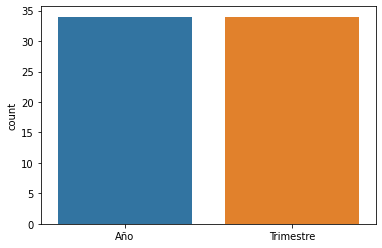

In [41]:
sns.countplot(internet_penet)

<AxesSubplot: ylabel='count'>

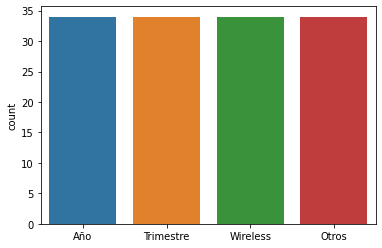

In [34]:
sns.countplot(internet_tec)

<AxesSubplot: ylabel='count'>

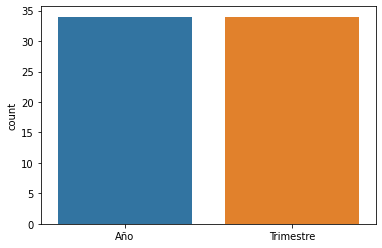

In [35]:
sns.countplot(internet_vel)

<AxesSubplot: ylabel='count'>

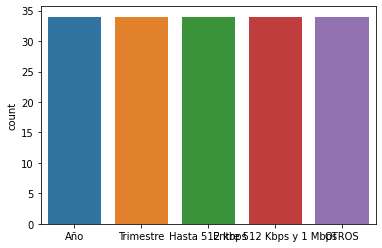

In [36]:
sns.countplot(internet_acc_vel)

### Obtener más información estadística de los datos que tenemos.

In [42]:
# Resumen de atributos numéricos para variables continuas
internet_penet.describe()

,Año,Trimestre
count,34.000000,34.000000
mean,2017.764706,2.441176
std,2.499198,1.133276
min,2014.000000,1.000000
25%,2016.000000,1.250000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [43]:
# Resumen de atributos numéricos para variables continuas
internet_tec.describe()

,Año,Trimestre,Wireless,Otros
count,34.000000,34.000000,34.000000,34.000000
mean,2017.764706,2.441176,239.196794,144.848765
std,2.499198,1.133276,168.361006,85.769506
min,2014.000000,1.000000,70.749000,54.300000
25%,2016.000000,1.250000,85.101750,61.122750
50%,2018.000000,2.000000,179.783500,99.712000
75%,2020.000000,3.000000,370.583500,248.369750
max,2022.000000,4.000000,556.243000,265.328000


In [44]:
# Resumen de atributos numéricos para variables continuas
internet_vel.describe()

,Año,Trimestre
count,34.000000,34.000000
mean,2017.764706,2.441176
std,2.499198,1.133276
min,2014.000000,1.000000
25%,2016.000000,1.250000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [45]:
# Resumen de atributos numéricos para variables continuas
internet_acc_vel.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,OTROS
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2017.764706,2.441176,50.576029,247.743059,111.612500
std,2.499198,1.133276,53.797941,200.653410,107.146845
min,2014.000000,1.000000,5.675000,28.521000,0.000000
25%,2016.000000,1.250000,24.381500,62.277250,0.000000
50%,2018.000000,2.000000,39.498500,218.732000,153.766500
75%,2020.000000,3.000000,41.236000,399.662750,194.241250
max,2022.000000,4.000000,241.713000,687.619000,351.594000


Histogramas: estos nos van a permitir ver los datos de naturaleza cuantitativa. El objetivo es saber cómo se distribuyen las entradas, si están centradas o sesgadas, los rangos de los datos, la distribución es unimodal o multimodal, etc. Con esto voy  apoder saber si necesito realizar alguna transformación a una variable determinada.

<function matplotlib.pyplot.show(close=None, block=None)>

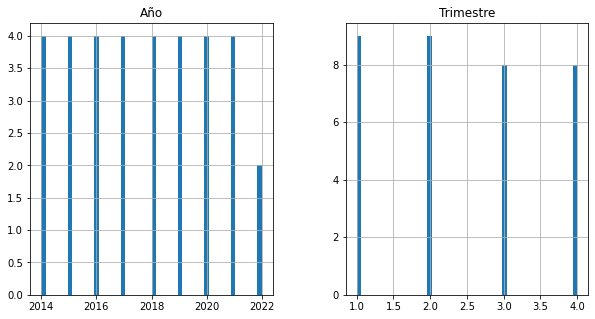

In [51]:
import matplotlib.pyplot as plt
internet_penet.hist(bins = 50, figsize = (10,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

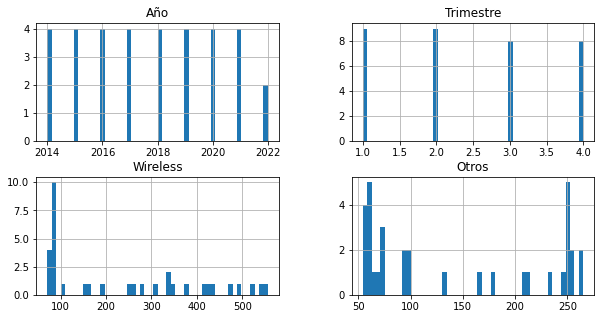

In [52]:
import matplotlib.pyplot as plt
internet_tec.hist(bins = 50, figsize = (10,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

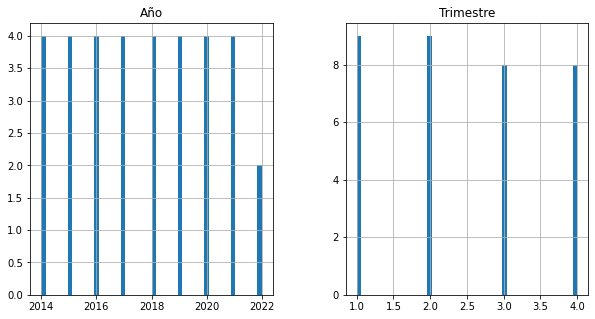

In [53]:
import matplotlib.pyplot as plt
internet_vel.hist(bins = 50, figsize = (10,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

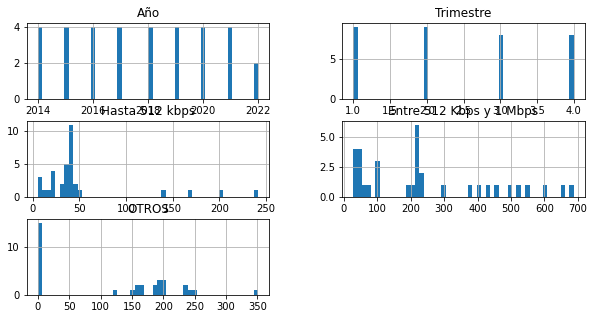

In [54]:
internet_acc_vel.hist(bins = 50, figsize = (10,5))
plt.show

Correlacion Heat-Maps:

Con el mapa de calor voy a poder ver si existe una correlación entre cualquier par de variables.La correlacion va a ser positiva cuando mas se acerca al 1.

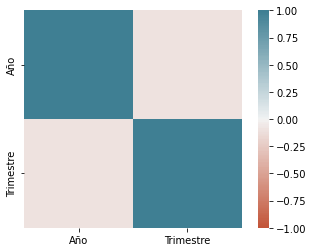

In [57]:
corr_matrix = internet_penet.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

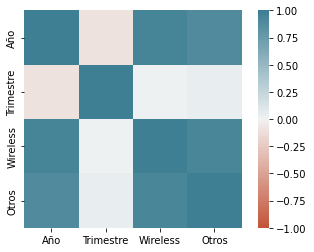

In [58]:
corr_matrix = internet_tec.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

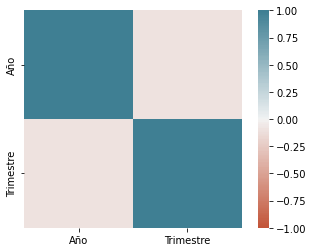

In [59]:
corr_matrix = internet_vel.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

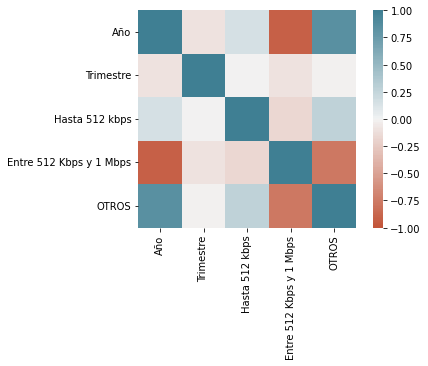

In [60]:
corr_matrix = internet_acc_vel.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

Conclusion: 

Con estas visualizaciones básicas que se realizamos con los datos nos sirvieron para descubrir patrones y anomalías (valores atípicos, nulls, valores faltantes, tipo de valores que tenemos y cuales debemos cambiar) y asi poder formular nuestras hipótesis basadas en nuestra comprensión del conjunto de datos. La visualizacion es normal sin sesgos.
La limpieza continua en Power Query.

### 